Importing the necessary libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Data Collection

In [3]:
wine_df = pd.read_csv(r"C:\Users\user\Downloads\winequality-red.csv")

Exploratory Data Analysis 
1. Non Graphical Analysis

In [6]:
wine_df.shape

(1599, 12)

.shape method tells us that there are 1599 rows and 12 columns in the dataset.

In [10]:
wine_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


.head function is used to print the first 5 rows of the dataset. It is an important function which gives the outllok of the values in the dataset. 

In [11]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

The dataset does not contain any Null Values

In [12]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


We can check a variety of usefull things with .info() such as the data types of the features, if the dataset has any Null values, total columns and rows. 

In [13]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Another usefull statistical method which is used to describe the mean, median, standard deviation and max values in the dataset. 

2. Graphical Analysis

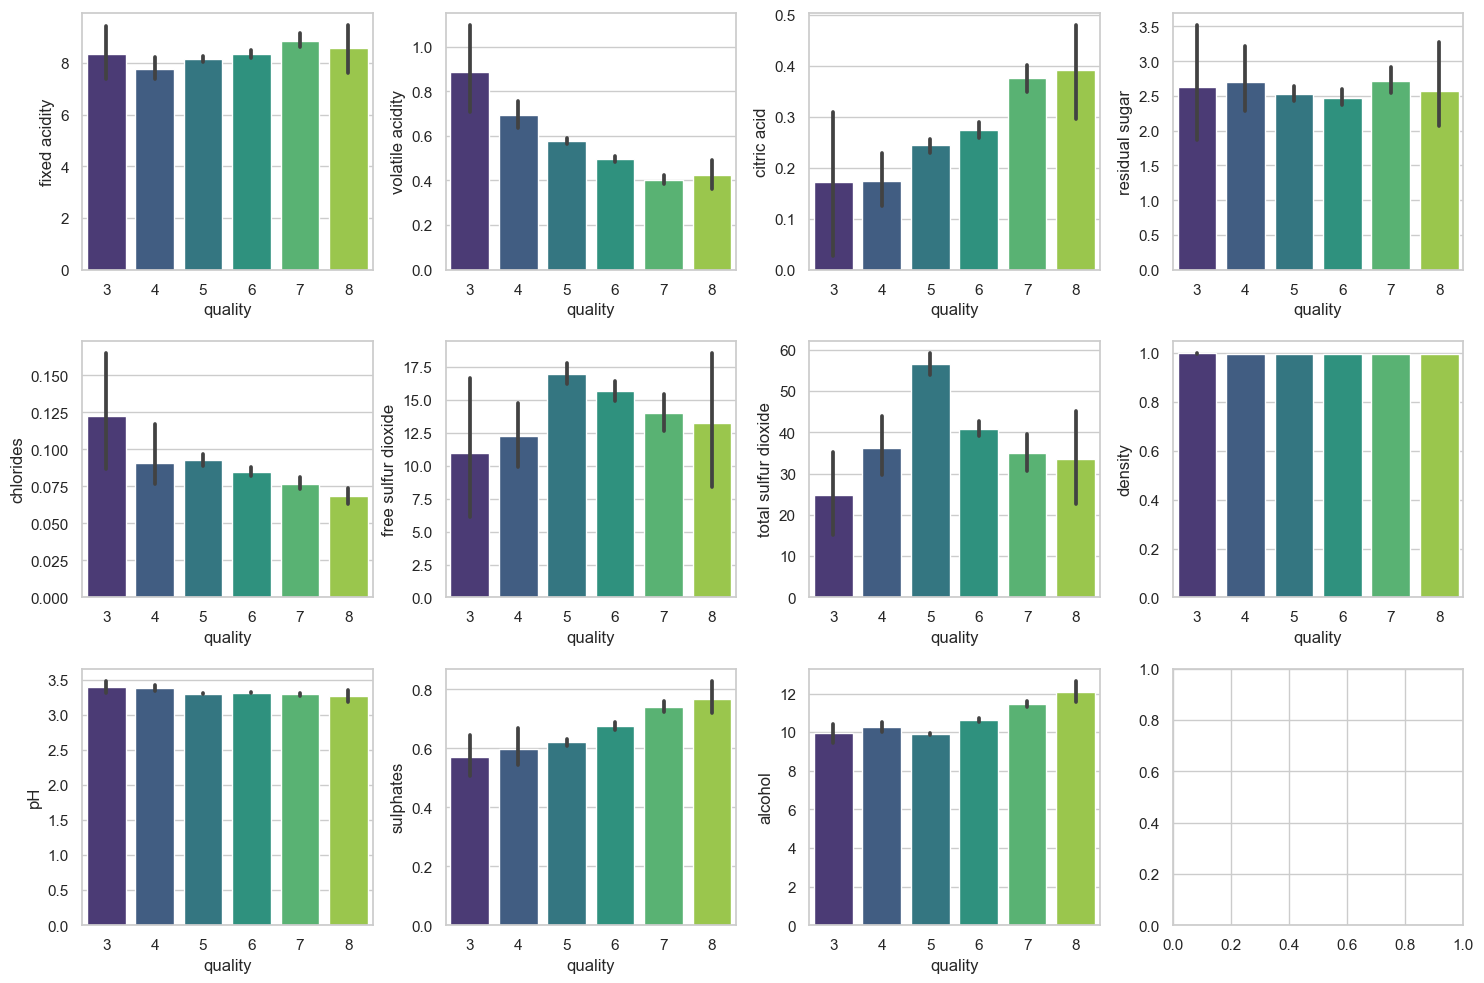

In [20]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
            'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
axes = axes.flatten()
for i, feature in enumerate(features[:-1]):  
    sns.barplot(x='quality', y=feature, data=wine_df, ax=axes[i], palette='viridis')
plt.tight_layout()
plt.show()

The various barplot comparing quality with different features shows that, features like Fixed Acidity, Residual Sugar, Free sulfur dioxide, Density, Ph does not have a big impact on the quality of the wine.While as features like Citric Acid, Sulphates and Alcohol increases the quality of the wine also gets better. Features like Volatile acidity & Chlorides shows that when both of these compounds decreases the quality of wine gets better.

Correlation

<Axes: >

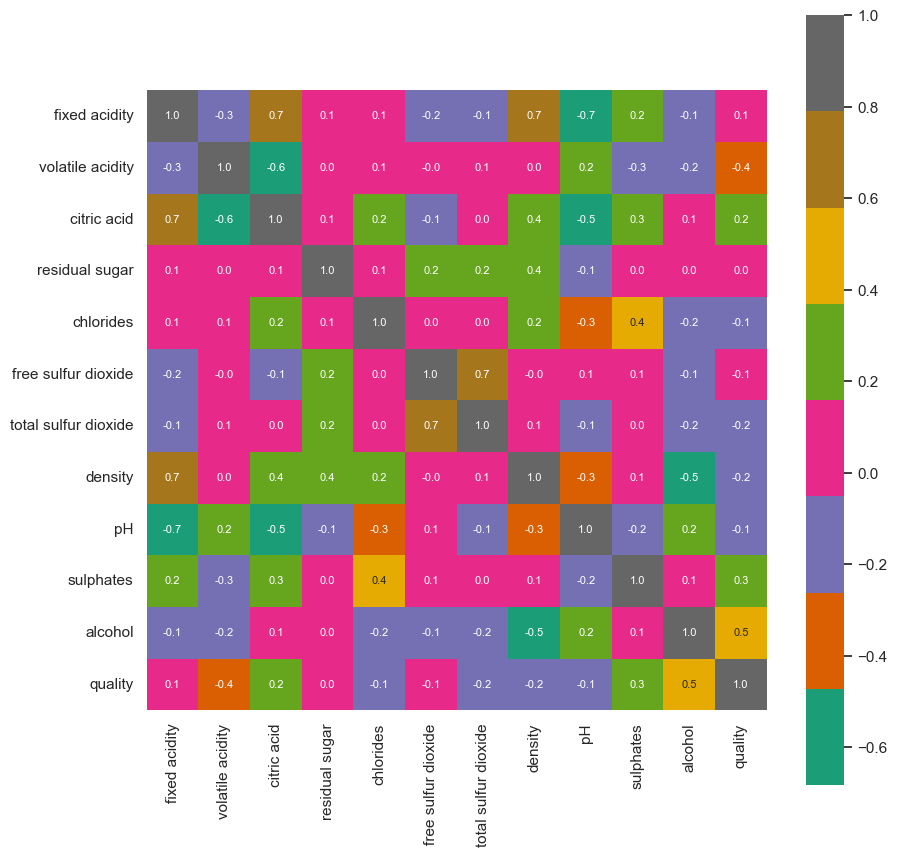

In [22]:
#Creating a correlation matrix with a heatmap to visualizethe correlation of all the features.
correlation = wine_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap="Dark2")

Looking at the Correlation matrix we have see that:-
Fixed Acidity is highly positively correlated with Citric acid and Density while being highly negatively correlated with Ph value.
Free sulfur dioxide is also positively correlated with total sulfur dioxide.

Data Preprocessing

In [23]:
# Dropping the quality column so that we can take the rest of the features as input.
x = wine_df.drop('quality',axis=1)

Label Binarization

Setting an arbitrary cutoff for the dependent variable(wine quality). So when the wine quality is 7 and above it will be classified as 1 and when the wine quality is below 7 it will be classified as 0.

In [25]:
y = wine_df['quality'].apply(lambda y_value:1 if y_value >=7 else 0)

Splitting the data into Train Test

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=100)

In [32]:
# Model Training
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [33]:
# Model Evaluation
x_pred = model.predict(x_test)
accuracy = accuracy_score(x_pred,y_test)

Printing the final accuracy

In [34]:
print(accuracy)

0.925


Our Evaluation Metric "Accuracy" which is calculated as (TP+TN)/(TP+FP+FN+TN), tells us that our model is 92% accurate. 